In [1]:
from backend import MODELS, highlight_emotions, blur_hate_speech, hate_clf
import cv2
from matplotlib import pyplot as plt
from watson_utils import get_prediction

/home/bartosz/code/Golem-2/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
2022-01-16 12:23:47.786572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-16 12:23:47.786600: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


models ready


## Dokumentacja
W ramach naszego rozwiązania zaimplementowaliśmy aplikację internetową rozwiązującą problem wykrywania i korekty negatywnych zachowań w sieci. Na nasze rozwiązanie składają się:
- wykrywanie mowy nienawiści w tekście oraz jej korekta przez rozmywanie negatywnej treści
- wykrywanie emocji w tekście
- wykrywanie emocji z wypowiedzi słownych

Wszystkie modele prawie zdeployowaliśmy na chmurze IBM.

### Wykrywanie mowy nienawiści
Wykrywanie mowy nienawiści w tekście ma na celu zapobiec wyświetlaniu nieodpowiednich treści dla użytkowników (szczególnie zwracając uwagę na dzieci i młodzież, dla których filtrowanie treści zawierającej na przykład wulgaryzmy jest szczególnie istotne).
Jako klasyfikator binarny tekstu w zadaniu wykrywania mowy nienawiści użyliśmy wytrenowanego modelu ByT5. Wcześniej na obrazie wykrywany jest tekst, który trafia na wejście klasyfikatora mowy nienawiści. Na podstawie uzyskanej odpowiedzi modelu tekst, który jest na obrazku, jest rozmywany w zależności od tego, czy został sklasyfikowany jako mowa nienawiści.

#### Przykład działania modelu

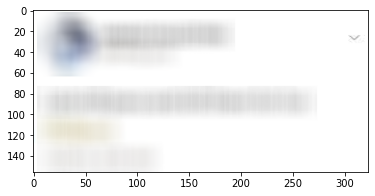

In [2]:
plt.imshow(blur_hate_speech(MODELS['hate'], MODELS['tok'], cv2.imread("hate.jpeg")))

### Wykrywanie emocji w tekście
Wykrywanie emocji w tekście ma na celu wykrywanie potencjalnie negatywnie nacechowanych treści, które cechują złość i strach.
Jako model do tego zadania użyliśmy przetrenowany model o architekturze DistilRoBERTa-base. Ograniczyliśmy się do wykrywania następujących emocji:
- gniewu
- wstrętu
- strachu
- radości
- neutralności
- smutku
- zdziwienia



#### Przykład działania modelu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


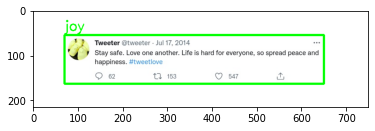

In [4]:
plt.imshow(highlight_emotions(MODELS['emo'], cv2.imread("nice_tweet6_2.jpg")))

#### Wykrywanie emocji z wypowiedzi słownych
W zaimplementowanym przez nas rozwiązaniu, wykorzystujemy system IBM Watson Speech to Text.Po przetworzeniu mowy na tekst przez system, tekst ten trafia na wejście modelu wykrywającego emocje w tekście, opisanego powyżej. Rozwiązanie to użmożliwia nam wykrywanie emocji na podstawie plików audio, co z kolei daje możliwości wykrywania emocji na przykład z transmisji streamingowych.

#### Przykład działania modelu
Na nagraniu **p13.mp3** nagrana jest wypowiedź "What a lovely day!"

In [5]:
hate_clf(MODELS['hate'], get_prediction("p13.mp3"), MODELS['tok'])

'no-hate-speech'

### Podsumowanie
Nasze rozwiązanie umożliwia, po odpowiednim wdrożeniu i konfiguracji, wykrywanie niechcianych i ofensywnych treści zarówno w mowie jak i tekście (również w tekście na obrazie). Pozwala to wdrożenie naszego rozwiązania do zwalczania problemu hejtu na przykład na portalach społecznościowych czy platformach streamingowych. 